In [90]:
import math
import numpy as np
import pandas as pd
import seaborn as sns

def print_full(x):
    pd.set_option('display.max_rows', len(x))
    display(x)
    pd.reset_option('display.max_rows')

In [98]:
median_sales_agg = pd.read_csv("MSPUS.csv")
median_sales_usa = pd.read_csv("Sale_Prices_City.csv")
kc_town_names = pd.read_csv("kc_town_names.csv", header=None).drop(columns=0)
kc_town_names.columns = ["city"]
city_zip = pd.read_csv("city_zip.csv")
median_sales_wash = median_sales_usa[median_sales_usa["StateName"]=="Washington"]
median_sales_kings = pd.merge(kc_town_names, median_sales_wash, how="inner", left_on="city", right_on="RegionName")
median_sales_kings_d = median_sales_kings.dropna(axis=1)
median_transposed = median_sales_kings_d.drop(columns=["RegionID","RegionName","StateName","SizeRank"]).set_index("city").transpose().reset_index()
median_transposed.columns = median_transposed.columns.map(lambda x: x if x != "index" else "date")

In [92]:
median_sales_agg["DATE"] = pd.to_datetime(median_sales_agg["DATE"], format='%Y-%m-%d')
median_transposed["date"] = pd.to_datetime(median_transposed["date"], format='%Y-%m')

In [6]:
df = pd.read_csv("kc_house_data_train.csv", index_col="Unnamed: 0")

In [7]:
df["date"]=df["date"].map(lambda x: x[0:8])
df["date"] = pd.to_datetime(df["date"], format='%Y%m%d')

In [15]:
for column in df.columns:
    print(column, df[column].isna().sum())


id 0
date 0
price 0
bedrooms 0
bathrooms 0
sqft_living 0
sqft_lot 0
floors 0
waterfront 0
view 0
condition 0
grade 0
sqft_above 0
sqft_basement 0
yr_built 0
yr_renovated 0
zipcode 0
lat 0
long 0
sqft_living15 0
sqft_lot15 0


In [22]:
df["date"]

0       2014-10-06
1       2014-08-21
2       2014-08-15
3       2015-03-31
4       2014-07-14
           ...    
17285   2015-03-03
17286   2014-05-20
17287   2014-05-14
17288   2014-12-04
17289   2015-01-16
Name: date, Length: 17290, dtype: datetime64[ns]

In [17]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [18]:
median_sales

,DATE,MSPUS
0,1963-01-01,17800.0
1,1963-04-01,18000.0
2,1963-07-01,17900.0
3,1963-10-01,18500.0
4,1964-01-01,18500.0
...,...,...
223,2018-10-01,322800.0
224,2019-01-01,313000.0
225,2019-04-01,322500.0
226,2019-07-01,318400.0


In [26]:
df[["lat","long"]]

,lat,long
0,47.4388,-122.162
1,47.6784,-122.285
2,47.5646,-122.129
3,47.6995,-122.228
4,47.6647,-122.083
...,...,...
17285,47.5858,-122.112
17286,47.6687,-122.288
17287,47.7635,-122.262
17288,47.4199,-121.990


In [27]:
df["date"].max()

Timestamp('2015-05-27 00:00:00')

In [9]:
median_sales[median_sales["StateName"]=="Washington"]["RegionName"].unique()

array(['Seattle', 'Vancouver', 'Spokane', 'Tacoma', 'Renton', 'Bellevue',
       'Kent', 'Bellingham', 'Yakima', 'Everett', 'Federal Way', 'Auburn',
       'Kennewick', 'Bothell', 'Redmond', 'Lynnwood', 'Spokane Valley',
       'Kirkland', 'Pasco', 'Marysville', 'Bremerton', 'Lakewood',
       'Snohomish', 'Edmonds', 'Sammamish', 'Olympia', 'Port Orchard',
       'Richland', 'Lacey', 'Shoreline', 'Puyallup', 'South Hill',
       'Longview', 'Spanaway', 'Burien', 'Mount Vernon', 'Bonney Lake',
       'Lake Stevens', 'Gig Harbor', 'Walla Walla', 'Arlington',
       'Wenatchee', 'Moses Lake', 'Woodinville', 'Port Angeles',
       'Battle Ground', 'Shelton', 'Oak Harbor',
       'Paine Field-Lake Stickney', 'Pullman', 'University Place',
       'Camas', 'Maple Valley', 'Ellensburg', 'Des Moines', 'Seatac',
       'Graham', 'Centralia', 'Poulsbo', 'Sequim', 'Parkland', 'Monroe',
       'Mercer Island', 'Kelso', 'Silverdale', 'Yelm', 'Sunnyside',
       'Kenmore', 'Washougal', 'Tukwila', 'Ch

In [21]:
# median_sales['in_kings'] = np.where(median_sales['StateName']=="Washington", 1,0)


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [15]:
median_sales["in_kings"].sum()

116

In [9]:
median_sales_wash

,RegionID,RegionName,StateName,SizeRank,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,...,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
23,16037,Seattle,Washington,24,410000.0,411500.0,412800.0,410400.0,401200.0,396300.0,...,671400.0,688500.0,701300.0,708200.0,698900.0,691300.0,683000.0,697200.0,709300.0,722200.0
63,48215,Vancouver,Washington,64,242300.0,240000.0,230700.0,228900.0,227200.0,226500.0,...,334600.0,337700.0,333300.0,333700.0,334100.0,337600.0,337800.0,338300.0,343700.0,350100.0
81,20604,Spokane,Washington,82,166100.0,160400.0,156700.0,155600.0,154900.0,155000.0,...,225700.0,216700.0,220700.0,218600.0,223300.0,222000.0,224000.0,225500.0,229800.0,236400.0
124,27362,Tacoma,Washington,125,228400.0,230200.0,221000.0,217100.0,209300.0,206600.0,...,301700.0,301100.0,302600.0,301000.0,306000.0,302200.0,302600.0,309100.0,322300.0,326200.0
218,13480,Renton,Washington,219,336000.0,335400.0,334500.0,323200.0,319100.0,313700.0,...,480100.0,485900.0,494100.0,485100.0,474600.0,475300.0,469600.0,475700.0,492000.0,518200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3663,55847,Goldendale,Washington,3664,NaN,NaN,NaN,NaN,NaN,NaN,...,142700.0,141400.0,144400.0,144500.0,155500.0,158900.0,170300.0,190900.0,203900.0,199900.0
3697,33121,Nine Mile Falls,Washington,3698,NaN,NaN,NaN,NaN,NaN,NaN,...,286300.0,270400.0,272700.0,298100.0,355500.0,366800.0,325400.0,298000.0,305400.0,NaN
3707,251873,Sedro-Woolley,Washington,3708,NaN,NaN,NaN,NaN,NaN,NaN,...,270200.0,275900.0,294600.0,292600.0,282500.0,281600.0,281800.0,301700.0,299300.0,314900.0
3806,47843,Steilacoom,Washington,3807,NaN,NaN,NaN,NaN,NaN,NaN,...,406100.0,342900.0,366300.0,368100.0,387100.0,400200.0,396100.0,416200.0,419100.0,456000.0


In [46]:
median_sales_kings

,city,RegionID,RegionName,StateName,SizeRank,2008-03,2008-04,2008-05,2008-06,2008-07,...,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
0,Auburn,16839,Auburn,Washington,401,306800.0,303200.0,285900.0,272600.0,273200.0,...,389200.0,390700.0,388800.0,388500.0,384500.0,379800.0,386900.0,394900.0,413700.0,413300.0
1,Bellevue,3619,Bellevue,Washington,229,NaN,NaN,NaN,NaN,NaN,...,884800.0,890500.0,921300.0,892500.0,897900.0,879400.0,865400.0,850700.0,916900.0,1006300.0
2,Bothell,3761,Bothell,Washington,441,384800.0,379100.0,366400.0,368100.0,364800.0,...,560000.0,573100.0,591700.0,594500.0,584900.0,594400.0,611700.0,619800.0,617100.0,601500.0
3,Burien,17229,Burien,Washington,1027,NaN,NaN,NaN,NaN,NaN,...,425600.0,417900.0,425200.0,424700.0,423500.0,426900.0,435400.0,466800.0,480300.0,NaN
4,Covington,51571,Covington,Washington,2410,276800.0,299000.0,304200.0,292400.0,288700.0,...,409800.0,414200.0,437100.0,430500.0,436200.0,418800.0,427400.0,421900.0,443000.0,436500.0
5,Des Moines,24372,Des Moines,Washington,1594,NaN,NaN,NaN,NaN,NaN,...,381400.0,380900.0,372300.0,381300.0,379400.0,365300.0,376000.0,390800.0,395900.0,NaN
6,Duvall,24462,Duvall,Washington,3257,NaN,NaN,NaN,NaN,NaN,...,586800.0,604100.0,633300.0,634600.0,604600.0,612800.0,593500.0,601900.0,587100.0,620000.0
7,Enumclaw,45171,Enumclaw,Washington,2255,NaN,NaN,NaN,NaN,NaN,...,432500.0,437600.0,407900.0,419100.0,407800.0,434200.0,422700.0,422400.0,416800.0,449500.0
8,Federal Way,45255,Federal Way,Washington,382,274300.0,274300.0,266000.0,257800.0,257600.0,...,364200.0,369500.0,380000.0,386500.0,389200.0,390100.0,397100.0,391000.0,395000.0,400200.0
9,Kenmore,42157,Kenmore,Washington,2142,NaN,NaN,NaN,NaN,NaN,...,662400.0,662700.0,647400.0,648100.0,647400.0,624400.0,612100.0,620600.0,660700.0,649500.0


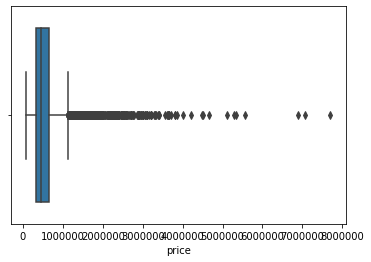

In [45]:
sns.boxplot(df["price"])

In [55]:
df["date"].min()

Timestamp('2014-05-02 00:00:00')

In [57]:
for column in median_sales_kings.columns:
    print(column, median_sales_kings[column].isna().sum())

city 0
RegionID 0
RegionName 0
StateName 0
SizeRank 0
2008-03 14
2008-04 14
2008-05 14
2008-06 14
2008-07 14
2008-08 14
2008-09 14
2008-10 14
2008-11 14
2008-12 14
2009-01 14
2009-02 14
2009-03 14
2009-04 13
2009-05 13
2009-06 13
2009-07 13
2009-08 13
2009-09 12
2009-10 12
2009-11 12
2009-12 12
2010-01 11
2010-02 11
2010-03 11
2010-04 11
2010-05 10
2010-06 9
2010-07 9
2010-08 9
2010-09 9
2010-10 9
2010-11 9
2010-12 9
2011-01 8
2011-02 8
2011-03 7
2011-04 7
2011-05 5
2011-06 5
2011-07 5
2011-08 4
2011-09 4
2011-10 4
2011-11 3
2011-12 3
2012-01 3
2012-02 3
2012-03 3
2012-04 2
2012-05 2
2012-06 1
2012-07 1
2012-08 1
2012-09 1
2012-10 1
2012-11 1
2012-12 1
2013-01 0
2013-02 0
2013-03 0
2013-04 0
2013-05 0
2013-06 0
2013-07 0
2013-08 0
2013-09 0
2013-10 0
2013-11 0
2013-12 0
2014-01 0
2014-02 0
2014-03 0
2014-04 0
2014-05 0
2014-06 0
2014-07 0
2014-08 0
2014-09 0
2014-10 0
2014-11 0
2014-12 0
2015-01 0
2015-02 0
2015-03 0
2015-04 0
2015-05 0
2015-06 0
2015-07 0
2015-08 0
2015-09 0
2015-10 0

In [89]:
median_transposed

city,date,Auburn,Bellevue,Bothell,Burien,Covington,Des Moines,Duvall,Enumclaw,Federal Way,...,Mercer Island,North Bend,Redmond,Renton,Sammamish,Seattle,Shoreline,Snoqualmie,Tukwila,Woodinville
0,2013-01,191100.0,523400.0,314400.0,220000.0,217900.0,192400.0,334500.0,232000.0,184000.0,...,806900.0,304200.0,454700.0,243700.0,498200.0,388000.0,333400.0,427200.0,151000.0,464100.0
1,2013-02,190200.0,518800.0,322700.0,201400.0,220700.0,184500.0,324100.0,236700.0,191000.0,...,891700.0,328200.0,448600.0,239100.0,494100.0,386400.0,330700.0,418400.0,157900.0,444300.0
2,2013-03,200600.0,496600.0,324600.0,204500.0,229900.0,172400.0,354800.0,225400.0,195200.0,...,922100.0,336400.0,447400.0,249600.0,513800.0,394400.0,294500.0,405800.0,179300.0,464600.0
3,2013-04,204400.0,494200.0,333400.0,212800.0,211600.0,182200.0,393000.0,232700.0,203500.0,...,888600.0,348900.0,464400.0,251500.0,531300.0,400500.0,288700.0,383000.0,166100.0,477300.0
4,2013-05,206700.0,501400.0,330900.0,232500.0,220100.0,207700.0,400500.0,239100.0,202000.0,...,822800.0,325800.0,458200.0,269700.0,530400.0,403700.0,286000.0,377100.0,168000.0,481300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,2019-07,384500.0,897900.0,584900.0,423500.0,436200.0,379400.0,604600.0,407800.0,389200.0,...,1520300.0,646800.0,811100.0,474600.0,914200.0,698900.0,570800.0,647900.0,374000.0,776300.0
79,2019-08,379800.0,879400.0,594400.0,426900.0,418800.0,365300.0,612800.0,434200.0,390100.0,...,1592500.0,627300.0,797800.0,475300.0,897500.0,691300.0,578200.0,669600.0,382400.0,833800.0
80,2019-09,386900.0,865400.0,611700.0,435400.0,427400.0,376000.0,593500.0,422700.0,397100.0,...,1547300.0,600400.0,809000.0,469600.0,918000.0,683000.0,570700.0,689500.0,379600.0,862300.0
81,2019-10,394900.0,850700.0,619800.0,466800.0,421900.0,390800.0,601900.0,422400.0,391000.0,...,1463500.0,611300.0,826600.0,475700.0,928100.0,697200.0,573500.0,745200.0,404400.0,832000.0


In [73]:
median_transposed

city,Auburn,Bellevue,Bothell,Burien,Covington,Des Moines,Duvall,Enumclaw,Federal Way,Kenmore,...,Mercer Island,North Bend,Redmond,Renton,Sammamish,Seattle,Shoreline,Snoqualmie,Tukwila,Woodinville
2013-01,191100.0,523400.0,314400.0,220000.0,217900.0,192400.0,334500.0,232000.0,184000.0,350800.0,...,806900.0,304200.0,454700.0,243700.0,498200.0,388000.0,333400.0,427200.0,151000.0,464100.0
2013-02,190200.0,518800.0,322700.0,201400.0,220700.0,184500.0,324100.0,236700.0,191000.0,359400.0,...,891700.0,328200.0,448600.0,239100.0,494100.0,386400.0,330700.0,418400.0,157900.0,444300.0
2013-03,200600.0,496600.0,324600.0,204500.0,229900.0,172400.0,354800.0,225400.0,195200.0,343400.0,...,922100.0,336400.0,447400.0,249600.0,513800.0,394400.0,294500.0,405800.0,179300.0,464600.0
2013-04,204400.0,494200.0,333400.0,212800.0,211600.0,182200.0,393000.0,232700.0,203500.0,348500.0,...,888600.0,348900.0,464400.0,251500.0,531300.0,400500.0,288700.0,383000.0,166100.0,477300.0
2013-05,206700.0,501400.0,330900.0,232500.0,220100.0,207700.0,400500.0,239100.0,202000.0,345400.0,...,822800.0,325800.0,458200.0,269700.0,530400.0,403700.0,286000.0,377100.0,168000.0,481300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-07,384500.0,897900.0,584900.0,423500.0,436200.0,379400.0,604600.0,407800.0,389200.0,647400.0,...,1520300.0,646800.0,811100.0,474600.0,914200.0,698900.0,570800.0,647900.0,374000.0,776300.0
2019-08,379800.0,879400.0,594400.0,426900.0,418800.0,365300.0,612800.0,434200.0,390100.0,624400.0,...,1592500.0,627300.0,797800.0,475300.0,897500.0,691300.0,578200.0,669600.0,382400.0,833800.0
2019-09,386900.0,865400.0,611700.0,435400.0,427400.0,376000.0,593500.0,422700.0,397100.0,612100.0,...,1547300.0,600400.0,809000.0,469600.0,918000.0,683000.0,570700.0,689500.0,379600.0,862300.0
2019-10,394900.0,850700.0,619800.0,466800.0,421900.0,390800.0,601900.0,422400.0,391000.0,620600.0,...,1463500.0,611300.0,826600.0,475700.0,928100.0,697200.0,573500.0,745200.0,404400.0,832000.0


In [64]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [93]:
median_transposed

city,date,Auburn,Bellevue,Bothell,Burien,Covington,Des Moines,Duvall,Enumclaw,Federal Way,...,Mercer Island,North Bend,Redmond,Renton,Sammamish,Seattle,Shoreline,Snoqualmie,Tukwila,Woodinville
0,2013-01-01,191100.0,523400.0,314400.0,220000.0,217900.0,192400.0,334500.0,232000.0,184000.0,...,806900.0,304200.0,454700.0,243700.0,498200.0,388000.0,333400.0,427200.0,151000.0,464100.0
1,2013-02-01,190200.0,518800.0,322700.0,201400.0,220700.0,184500.0,324100.0,236700.0,191000.0,...,891700.0,328200.0,448600.0,239100.0,494100.0,386400.0,330700.0,418400.0,157900.0,444300.0
2,2013-03-01,200600.0,496600.0,324600.0,204500.0,229900.0,172400.0,354800.0,225400.0,195200.0,...,922100.0,336400.0,447400.0,249600.0,513800.0,394400.0,294500.0,405800.0,179300.0,464600.0
3,2013-04-01,204400.0,494200.0,333400.0,212800.0,211600.0,182200.0,393000.0,232700.0,203500.0,...,888600.0,348900.0,464400.0,251500.0,531300.0,400500.0,288700.0,383000.0,166100.0,477300.0
4,2013-05-01,206700.0,501400.0,330900.0,232500.0,220100.0,207700.0,400500.0,239100.0,202000.0,...,822800.0,325800.0,458200.0,269700.0,530400.0,403700.0,286000.0,377100.0,168000.0,481300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,2019-07-01,384500.0,897900.0,584900.0,423500.0,436200.0,379400.0,604600.0,407800.0,389200.0,...,1520300.0,646800.0,811100.0,474600.0,914200.0,698900.0,570800.0,647900.0,374000.0,776300.0
79,2019-08-01,379800.0,879400.0,594400.0,426900.0,418800.0,365300.0,612800.0,434200.0,390100.0,...,1592500.0,627300.0,797800.0,475300.0,897500.0,691300.0,578200.0,669600.0,382400.0,833800.0
80,2019-09-01,386900.0,865400.0,611700.0,435400.0,427400.0,376000.0,593500.0,422700.0,397100.0,...,1547300.0,600400.0,809000.0,469600.0,918000.0,683000.0,570700.0,689500.0,379600.0,862300.0
81,2019-10-01,394900.0,850700.0,619800.0,466800.0,421900.0,390800.0,601900.0,422400.0,391000.0,...,1463500.0,611300.0,826600.0,475700.0,928100.0,697200.0,573500.0,745200.0,404400.0,832000.0


In [101]:
df["zipcode"].unique()

array([98058, 98115, 98006, 98034, 98052, 98031, 98007, 98199, 98027,
       98119, 98122, 98155, 98055, 98118, 98014, 98059, 98004, 98053,
       98072, 98133, 98092, 98074, 98125, 98045, 98106, 98022, 98177,
       98008, 98002, 98040, 98029, 98042, 98001, 98065, 98056, 98144,
       98188, 98109, 98010, 98075, 98198, 98030, 98105, 98023, 98028,
       98112, 98038, 98116, 98103, 98178, 98168, 98005, 98077, 98146,
       98011, 98126, 98108, 98136, 98033, 98003, 98117, 98107, 98019,
       98102, 98032, 98148, 98166, 98070, 98024, 98039])

In [99]:
city_zip

,city,zip
0,98058,Renton
1,98115,Seattle
2,98006,Bellevue
3,98034,Kirkland
4,98052,Redmond
...,...,...
65,98148,Seattle
66,98166,Seattle
67,98070,Vashon
68,98024,Fall City
